<a href="https://colab.research.google.com/github/thitirat-mnc/wongnai-restuarants-rating-classification/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load and Inspect DATA
---



In [ ]:
!pip install pythainlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 30.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from pythainlp import word_tokenize
from ast import literal_eval
from tqdm import tqdm_notebook
from collections import Counter

#viz
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!head w_review_train.csv

"ร้านอาหารใหญ่มากกกกกกก 
เลี้ยวเข้ามาเจอห้องน้ำก่อนเลย เออแปลกดี 
ห้องทานหลักๆอยู่ชั้น 2 มีกาแฟ น้ำผึ้ง ซึ่งก็แค่เอาน้ำผึ้งมาราด แพงเวอร์ อย่าสั่งเลย 
ลาบไข่ต้ม ไข่มันคาวอะ เลยไม่ประทับใจเท่าไหร่
ทอดมันหัวปลีกรอบอร่อยต้องเบิ้ล 
พะแนงห่อไข่อร่อยดี เห้ยแต่ราคา 150บาทมันเกินไปนะ รับไม่ไหวว
เลิกกินแล้วมีขนมหวานให้กินฟรีเล็กน้อย )ขนมไทย) 

คงไม่ไปซ้ำ แพงเกิน",3
"อาหารที่นี่เป็นอาหารจีนแคะที่หากินยากในบ้านเรา ตัวร้านตั้งอยู่ที่ถนนพุทธมณฑลสาย 3 ไปตาม ถ.ปิ่นเกล้า-นครชัยศรี เมื่อถึงพุทธมณฑลสาย 3 ก็เลี้ยวเข้าไปประมาณ 500 เมตร ร้านอยู่ทางซ้ายมือค่ะ มีคนบอกมาว่าความพิเศษของร้านนี้คือกุ๊กเก่าและเป็นกุ๊กรุ่นสุดท้ายจาก ""ฮก ลก ซิ่ว” ภัตตาคารจีนชื่อดังย่านราชประสงค์ ที่เลิกกิจการไปแล้ว ต้องคนที่อายุเลข 5 ขึ้นไปจึงจะเคยกิน ฮก ลก ซิ่ว  จานเด็ดที่มีขายที่นี่แห่งเดียวในเมืองไทยคือ ปลาเต๋าเต้ย 2 ฤดู เป็นสูตรจากมาเลเซีย นอกนั้นก็มี ผัดผักน้ำมันหอย ไก่เบตง เคาหยก ปูทะเลซุปน้ำใสหม้อไฟ เต้าหู้แคระยัดไส้หม้อดิน และ ลูกชิ้นแคระ 


In [ ]:
#pb only
!pip install openpyxl

import pandas as pd

# Read the Excel file using Pandas
df = pd.read_excel('/content/w_review_train.xlsx', engine='openpyxl')

# Rename the columns
df.columns = ['review', 'star']

# Display the contents of the DataFrame
print(df.shape)
df.tail()

(40000, 2)


,review,star
39995,รู้จักร้านนี้จากวงใน ร้านอยู่ในอาคารพาณิชย์ตรง...,4
39996,ร้านซูชิอาหารญี่ปุ่น อยู่ตรงสะพานลอย เกษตรประต...,4
39997,"""Cantina Wine Bar & Italian Kitchen"" ร้านเล็กๆ...",5
39998,ร้านเค้กน่ารักๆ ตรงชั้นล่างของห้างเซ็นทรัลลาดพ...,3
39999,วันนี้มากินกันไกลถึงแม่สอดจังหวัดตากติดกับชายแ...,3


#label distribution

In [ ]:
import re
from sklearn.feature_extraction import DictVectorizer
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
train, dev = train_test_split(df, train_size=0.85, random_state=160)

In [ ]:
train.star.value_counts() #train 34000 rows, dev 6000 rows

4    15976
3    10312
5     5767
2     1585
1      360
Name: star, dtype: int64

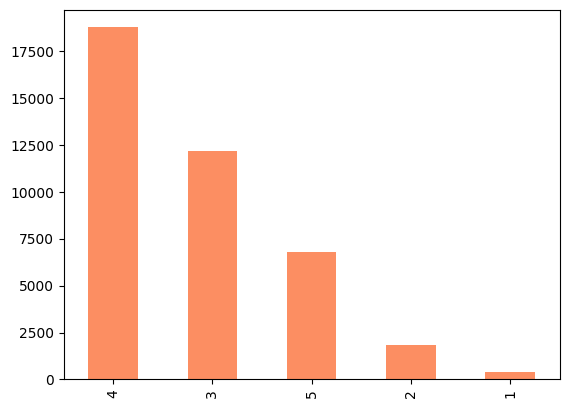

In [ ]:
df.star.value_counts(sort=True).plot.bar(color='#FC8E62');

In [ ]:
df['star'].unique()

array([3, 4, 5, 2, 1])

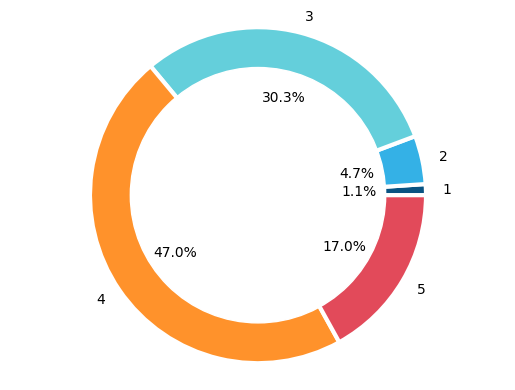

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

data = train.groupby('star')['star'].count()
labels = ['1', '2', '3', '4', '5']
colors = ['#095382', '#34B1E6', '#64CFDB', '#FF922B', '#E24A5A']
white_edgecolor = 'white'  # Color of the separator lines
separator_linewidth = 3  # Thickness of the separator lines

fig, ax = plt.subplots()
# Create the pie chart with thicker white separator lines
wedges, texts, autotexts = ax.pie(data, autopct="%.1f%%", labels=labels, colors=colors,
                                  wedgeprops={'edgecolor': white_edgecolor, 'linewidth': separator_linewidth})
center_circle = patches.Circle((0, 0), 0.76, color='white')
ax.add_artist(center_circle)
ax.axis('equal')

plt.show()


#Data Cleaning

In [ ]:
from pythainlp import word_tokenize

text = "ทดสอบการตัดตำภาษาไทย"
proc = word_tokenize(text, engine='newmm')
print(proc)

['ทดสอบ', 'การ', 'ตัด', 'ตำ', 'ภาษาไทย']


In [ ]:
def tokenize(text):
  tokens = word_tokenize(text, engine='newmm')
  cleaned_tokens = [token.strip() for token in tokens if token.strip()]  # Remove empty tokens
  return '|'.join(cleaned_tokens)

In [ ]:
train['tokens'] = train.review.apply(tokenize)
dev['tokens'] = dev.review.apply(tokenize)
train.tail()

,review,star,tokens
3932,ร้านสบายสบายสไตล์บาหลีสมกับชื่อร้าน บาอิค บาอิ...,4,ร้าน|สบาย|สบาย|สไตล์|บาหลี|สม|กับ|ชื่อ|ร้าน|บา...
10152,ร้านจริณ เบเกอร์รี่และเค้ก ตั้งอยู่ที่ถนนนิมมา...,4,ร้าน|จ|ริ|ณ|เบเกอร์|รี่|และ|เค้ก|ตั้งอยู่|ที่|...
39855,สุกี้ดารา\n\nสุกี้ดารา\n\nสุกี้ดารา\n\nแอททททล...,3,สุกี้|ดารา|สุกี้|ดารา|สุกี้|ดารา|แอ|ทท|ทท|ลาดก...
3226,i like icecream เป็นร้านใหญ่อยู่หลังมช.ค่ะ โดด...,4,i|like|icecream|เป็น|ร้าน|ใหญ่|อยู่|หลัง|มช.|ค...
15208,เป็นสโมสรกองเรือทุ่นระเบิด ของทหารเรือ มีทั้ง ...,4,เป็น|สโมสร|กองเรือ|ทุ่นระเบิด|ของ|ทหารเรือ|มี|...


#Logistic Regression

In [ ]:
# Feature engineering
def featurize(text):
    return {x:1 for x in text.split('|')}

vectorizer = DictVectorizer(sparse=True)
train_features = train['tokens'].apply(featurize)
feature_vectors = vectorizer.fit_transform(train_features)

# Train model
lr_text_classifier = LogisticRegression()
lr_text_classifier.fit(feature_vectors, train['star'])

# Evaluation
dev_features = dev['tokens'].apply(featurize)
dev_feature_vectors = vectorizer.transform(dev_features)
dev_predictions_aspect = lr_text_classifier.predict(dev_feature_vectors)
print(classification_report(dev_predictions_aspect, dev['star']))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


              precision    recall  f1-score   support

           1       0.20      0.35      0.26        31
           2       0.21      0.27      0.24       203
           3       0.47      0.50      0.49      1766
           4       0.61      0.54      0.58      3152
           5       0.32      0.39      0.35       848

    accuracy                           0.50      6000
   macro avg       0.36      0.41      0.38      6000
weighted avg       0.52      0.50      0.51      6000



#Test Set

In [ ]:
test_df = pd.read_csv('/content/test_file.csv', sep=';', header=None, names=['id', 'review'])
print(test_df.shape)
test_df.tail()

(6204, 2)


,id,review
6199,6199,ร้านโรตีสายไหมพญาวัง อยู่ถนนรัตนโกสินทร์ หลังโ...
6200,6200,ข้าวผัดคอหมูย่าง ข้าวผัดมากลิ่นหอม คอหมูย่างอร...
6201,6201,ร้านอาหารมีหลายโซน แนะนำให้เดินดูก่อนค่อยเลือก...
6202,6202,ขนมปังร้านในเครือยามาซากิ จริงๆร้านนี้เปิ...
6203,6203,ร้านอาหารใหญ่มากกกกกกก \nเลี้ยวเข้ามาเจอห้องน้...


In [ ]:
test_df = test_df.iloc[1:]
test_df.head()

,id,review,tokens
1,1,ร้านนี้จะอยู่เส้นสันกำแพง-แม่ออน เลยแยกบ่...,ร้าน|นี้|จะ|อยู่|เส้น|สัน|กำแพง|-|แม่ออน|เลย|แ...
2,2,สั่งไป2 เมนู คือมัชฉะลาเต้ร้อน กับ ไอศครีมชาเข...,สั่ง|ไป|2|เมนู|คือ|มัช|ฉะ|ลาเต้|ร้อน|กับ|ไอศคร...
3,3,ครัววงเดือน \n\nหิวดึกๆ ตระเวนหาร้านทาน มาเจอ...,ครัว|วงเดือน|หิว|ดึก|ๆ|ตระเวน|หา|ร้าน|ทาน|มา|เ...
4,4,จะว่าเป็นเจ้าประจำก็คงไม่ผิด แต่ก็ไม่กล้า...,จะ|ว่า|เป็น|เจ้าประจำ|ก็|คง|ไม่|ผิด|แต่|ก็|ไม่...
5,5,ถ้าคิดถึงสลัดผมคิดถึงร้านนี้เป็นร้านแรกๆเลยครั...,ถ้า|คิดถึง|สลัด|ผม|คิดถึง|ร้าน|นี้|เป็น|ร้าน|แ...


In [ ]:
test_df['tokens'] = test_df.review.apply(tokenize)

In [ ]:
test_df.head()

,id,review,tokens
1,1,ร้านนี้จะอยู่เส้นสันกำแพง-แม่ออน เลยแยกบ่...,ร้าน|นี้|จะ|อยู่|เส้น|สัน|กำแพง|-|แม่ออน|เลย|แ...
2,2,สั่งไป2 เมนู คือมัชฉะลาเต้ร้อน กับ ไอศครีมชาเข...,สั่ง|ไป|2|เมนู|คือ|มัช|ฉะ|ลาเต้|ร้อน|กับ|ไอศคร...
3,3,ครัววงเดือน \n\nหิวดึกๆ ตระเวนหาร้านทาน มาเจอ...,ครัว|วงเดือน|หิว|ดึก|ๆ|ตระเวน|หา|ร้าน|ทาน|มา|เ...
4,4,จะว่าเป็นเจ้าประจำก็คงไม่ผิด แต่ก็ไม่กล้า...,จะ|ว่า|เป็น|เจ้าประจำ|ก็|คง|ไม่|ผิด|แต่|ก็|ไม่...
5,5,ถ้าคิดถึงสลัดผมคิดถึงร้านนี้เป็นร้านแรกๆเลยครั...,ถ้า|คิดถึง|สลัด|ผม|คิดถึง|ร้าน|นี้|เป็น|ร้าน|แ...


In [ ]:
test_features = test_df['tokens'].apply(featurize)
test_feature_vectors = vectorizer.transform(test_features)
test_predictions = lr_text_classifier.predict(test_feature_vectors)

In [ ]:
len(test_predictions)

6203

In [ ]:
# create new dataframe
lr_test_predictions = pd.DataFrame()

# add columns (เอาผลมารวมกัน)
lr_test_predictions['id'] = test_df['id']
lr_test_predictions['star'] = test_predictions
lr_test_predictions
# export to csv
lr_test_predictions.to_csv('lr_test_predictions.csv', index=None)
# evaluate "lab4_train.csv" ไม่ต้องเปลี่ยน

In [ ]:
!python3 evaluate.py /content/solution_file.csv /content/lr_test_predictions.csv

INCORRECT COLUMN NAME : must have "id", "aspectCategory", "polarity"


In [ ]:
solution = pd.read_csv('/content/solution_file.csv', sep=',', header=None, names=['id', 'star'])

In [ ]:
solution = solution.iloc[1:]
solution.head()

,id,star
1,1,4
2,2,3
3,3,3
4,4,4
5,5,5


In [ ]:
test_predictions = [str(star) for star in test_predictions]

In [ ]:
true_labels = solution['star']

# Filter out non-numeric labels
#numeric_labels = [label for label in true_labels if isinstance(label, (int, float))]

# Convert numeric labels to integers
#numeric_labels_int = [int(label) for label in numeric_labels]

# Now you can use numeric_labels_int in your calculations or comparisons
print(classification_report(test_predictions, true_labels))


              precision    recall  f1-score   support

           1       0.28      0.39      0.33        36
           2       0.33      0.33      0.33       202
           3       0.49      0.51      0.50      1834
           4       0.61      0.56      0.58      3274
           5       0.31      0.38      0.34       857

    accuracy                           0.51      6203
   macro avg       0.40      0.43      0.42      6203
weighted avg       0.52      0.51      0.52      6203

